# 제 3차 조별 데이터 분석 실습

* Mission
    * 지금까지 배운 기술을 활용하여 데이터 분석을 해본다.
    * 데이터 원본 분석을 한다.
    * 결측치, 이상치를 점검해 본다.
    * 전처리
    * 탐색적 연구 (Step1, Step2를 반복하여 데이터 분석의 깊이를 더한다.)
         * Step1] 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다. 
         * Step2] 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.
    * 최종 결론을 내린다.

## 아래에 데이터를 import 하세요.

In [4]:
# 데이터 import 코드 구현
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# chipo = pd.read_csv('data/book_data.csv',encoding='utf-8')

In [5]:
book=pd.read_csv('../data/book_data.csv',encoding='cp949')

In [6]:
book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
0,올 더 빌딩스 인 런던,제임스 걸리버 핸콕,2018-08-25,"14,400",양장본,140,225*280mm,476,예술/대중문화,책발전소,110
1,렛 잇 블리드,이언 랜킨,2018-08-19,"13,320",반양장본,476,128*188mm,476,소설/시/희곡,오픈하우스,110
2,은유로 사회 읽기,대니얼 리그니,2018-08-20,"39,500",양장본,416,152*223mm,749,사회과학,한울(한울아카데미),10
3,유럽 맥주 여행,백경학,2018-08-24,"14,400",반양장본,308,150*220mm,400,역사,글항아리,10
4,"이게, 행복이 아니면 무엇이지",김혜령,2018-08-20,"13,050",NaN,288,135*200mm,374,인문학,웨일북,10


## 데이터 원본 분석

### 아래 내용을 확인하세요
* 데이터 사이즈
* 데이터 타입
* 각 열의 의미 (열의 이름 및 데이터를 보고 팀원과 상의하여 분석)
* 기타 확인하고 싶은 사항

In [7]:
book.size #2200개의 데이터

22000

In [8]:
book.dtypes #컬럼별 타입

book_name         object
book_writer       object
book_date         object
book_price        object
book_cover        object
book_page         object
book_size         object
book_weight        int64
book_category     object
book_publisher    object
sales_point       object
dtype: object

In [9]:
book.columns

Index(['book_name', 'book_writer', 'book_date', 'book_price', 'book_cover',
       'book_page', 'book_size', 'book_weight', 'book_category',
       'book_publisher', 'sales_point'],
      dtype='object')

### 원본 데이터 분석 후 학습한 사항

### 여기에 기술하세요

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

## 전처리 작업

In [10]:
book['sales_point']=book['sales_point'].str.replace(',','',regex=True).astype('float')
book['book_price']=book['book_price'].str.replace(',','',regex=True).astype('float64')

In [11]:
book['book_cover']=book['book_cover'].fillna('일반본')

In [12]:
book[book['book_publisher'].str.startswith('2018')]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1960,진실이 말소된 페이지,손아람,초판출간 2008년,12420.0,반양장본,424,135*210mm,513,소설/시/희곡,2018-05-31,310.0


In [13]:
idx=book[book['book_publisher'].str.startswith('2018')].index

In [14]:
book.loc[idx,'book_date']=book.loc[idx,'book_publisher']

In [15]:
book.loc[idx,'book_publisher']='들녘'

In [16]:
book.loc[idx]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1960,진실이 말소된 페이지,손아람,2018-05-31,12420.0,반양장본,424,135*210mm,513,소설/시/희곡,들녘,310.0


In [17]:
pd.to_datetime(book['book_date']).dt.month
book['book_date']=pd.to_datetime(book['book_date']).dt.month

In [18]:
book['book_date']

0       8
1       8
2       8
3       8
4       8
       ..
1995    6
1996    5
1997    6
1998    6
1999    5
Name: book_date, Length: 2000, dtype: int64

In [19]:
book[~book['book_page'].str.isdigit()]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1577,이 나날의 돌림노래,사사키 아타루,6,15300.0,반양장본,쪽수 확인,145*215mm,490,인문학,여문책,1545.0


In [20]:
page_idx=book[~book['book_page'].str.isdigit()].index
book.loc[page_idx,'book_page']='255'

In [21]:
book['book_page']=book['book_page'].astype('int64')

## 결측치, 이상치 처리 방안 결정
 * 처리방안
 * 처리방안 이유

## 여기에 처리방안 및 처리방안 이유를 기술하세요.
* page가 숫자가 아닌 값을 검색해 이상값 발견 > 출판사 문의 후 정정
* date가 2018로 시작하지 않는 값을 검색해 이상값 발견 > 같은 행의 출판사 행에 오입력된 것을 발견 후 정정, 이후 출판사명 문의 후 출판사명 정정 

## 탐색적 데이터 분석

## 1차 탐색적 분석

### Step1
데이터 분석의 목적, 대상 또는 가설을 세운다.
* 페이지수가 증가할 수록 책의 가격이 높아질 것이다.
* 출시한 월에따라 sales point가 다를 것이다. 9,10,11월인 가을이 높을 것이다.
* book cover가 양장본일수록 price가 높을 것이다.
* 높은 sales를 받은 책은 무엇인가?
* 카테고리별 sales point를 비교해보고자 한다. 

In [22]:
cover_price=pd.DataFrame(book.groupby('book_cover')['book_price'].mean())
cover_price.reset_index(inplace=True)
cover_price

,book_cover,book_price
0,반양장본,14366.933657
1,양장본,17074.429530
2,일반본,16931.198738


In [24]:
book_writer=book.sort_values(by='sales_point',ascending=False)

In [25]:
sort_by_sale=book.sort_values(by='sales_point',ascending=False)

In [26]:
sort_by_sale.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1823,역사의 역사,유시민,6,14400.0,반양장본,340,152*223mm,583,역사,돌베개,408240.0
505,나미야 잡화점의 기적 (100만 부 기념 특별 한정판),히가시노 게이고,7,13320.0,양장본,456,127*188mm,569,소설/시/희곡,현대문학,375092.0
1540,죽고 싶지만 떡볶이는 먹고 싶어,백세희,6,12420.0,반양장본,208,130*188mm,292,에세이,흔,188670.0
1664,열두 발자국,정재승,7,15120.0,반양장본,400,145*217mm,555,인문학,어크로스,154520.0
1360,인생좌표,이케다 다이사쿠,6,9000.0,양장본,240,128*188mm,401,자기계발,중앙books(중앙북스),152865.0


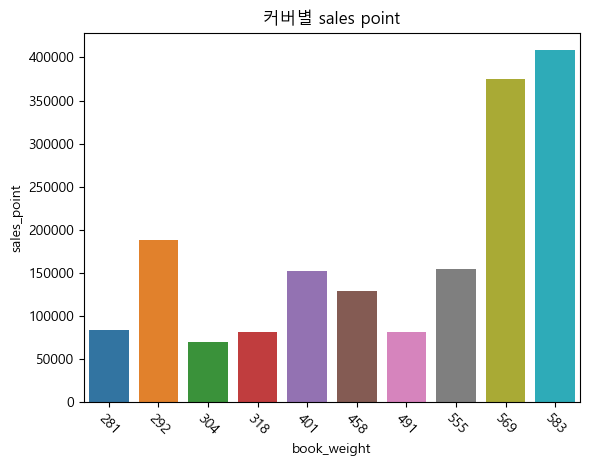

In [27]:
plt.xticks(rotation = -45)
plt.title('커버별 sales point')
sns.barplot(x='book_weight',y='sales_point',data=sort_by_sale.head(10))
plt.show()

In [28]:
month_avg_point=pd.DataFrame(book.groupby('book_date')['sales_point'].sum())
month_avg_point.reset_index(inplace=True)
month_avg_point

,book_date,sales_point
0,3,42557.0
1,4,1015.0
2,5,60964.0
3,6,3061095.0
4,7,2987059.0
5,8,1154156.0
6,9,28640.0


In [29]:
march_book=book[book['book_date']==3]
march_book

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
563,꼬마 역무원 모리스,메그 맥라렌,3,10800.0,양장본,38,250*260mm,408,유아,웅진주니어,80.0
1014,보노보노의 인생상담 (여름 한정 홀로그램 파우치 에디션),이가라시 미키오,3,14400.0,반양장본,320,145*190mm,416,에세이,놀(다산북스),42477.0


In [30]:
jun_book=book[book['book_date']==6]
jun_book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
53,[세트] 역사의 역사 + 시민커피 드립백 세트,유시민,6,22500.0,반양장본,340,148*210mm,583,역사,돌베개,210.0
152,근대서지 2018 제17호,근대서지학회,6,38700.0,반양장본,682,152*223mm,967,인문학,소명출판,170.0
217,고양이,손유영,6,13500.0,일반본,47,220*280mm,127,예술/대중문화,민화,120.0
229,행복한 보드북 3종 세트 - 전3권,미스 반 하우트,6,25650.0,일반본,60,150*183mm,780,유아,보림,100.0
265,모던 경성의 시각문화와 일상,한국미술연구소 한국근대시각문화연구팀,6,19000.0,일반본,300,168*230mm,570,예술/대중문화,한국미술연구소CAS,360.0


In [31]:
july_book=book[book['book_date']==7]
july_book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
56,베이비 스마트 : 폭신폭신 사운드 베어,애플비북스 편집부,7,11760.0,일반본,16,303*245mm,43,유아,애플비,60.0
63,국새와 어보,성인근,7,19800.0,반양장본,304,152*216mm,535,역사,현암사,110.0
97,오늘의 교육 2018.7.8월호,교육공동체벗 편집부,7,14250.0,반양장본,248,152*223mm,347,사회과학,교육공동체벗,210.0
114,투자자가 된 인문학도,조현철,7,17100.0,반양장본,424,152*225mm,806,경제경영,지식노마드,1650.0
129,생명의 정원,메리 레이놀즈,7,26820.0,양장본,408,152*195mm,595,과학,목수책방,1300.0


In [32]:
cover_count=pd.DataFrame(book.groupby('book_cover')['book_price'].count())
cover_count.reset_index(inplace=True)
cover_count

,book_cover,book_price
0,반양장본,1236
1,양장본,447
2,일반본,317


---

### Step2
Step1에서 세운 가설을 지금까지 배운 모든 기술을 활용하여 검증해 보세요.
예) 통계자료, 데이터 재구조화, 시각화등

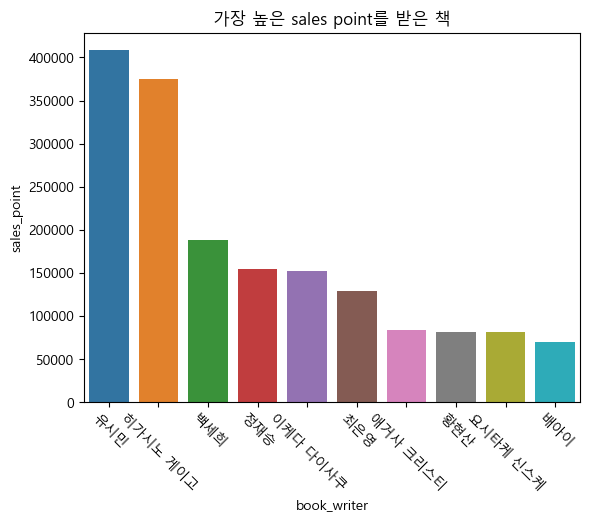

In [33]:
plt.xticks(rotation = -45)
plt.title('가장 높은 sales point를 받은 책')
sns.barplot(x='book_writer',y='sales_point',data=sort_by_sale.head(10))
plt.show()

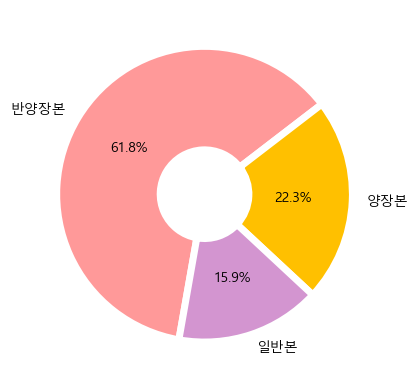

In [34]:
ratio = cover_count['book_price']
labels = cover_count['book_cover']
colors = ['#ff9999', '#ffc000',  '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

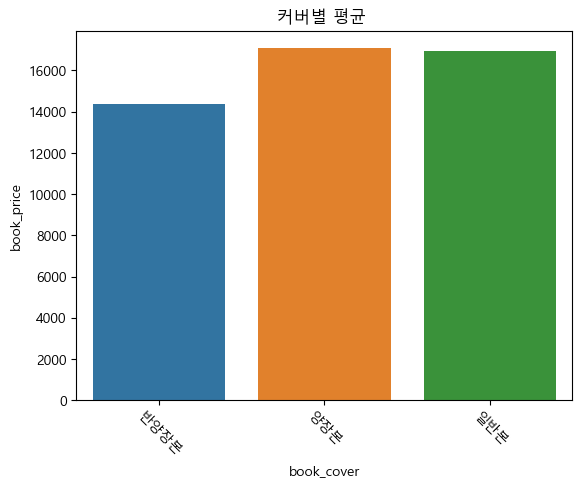

In [35]:
plt.xticks(rotation = -45)
plt.title('커버별 평균 ')
sns.barplot(x='book_cover',y='book_price',data=cover_price)
plt.show()

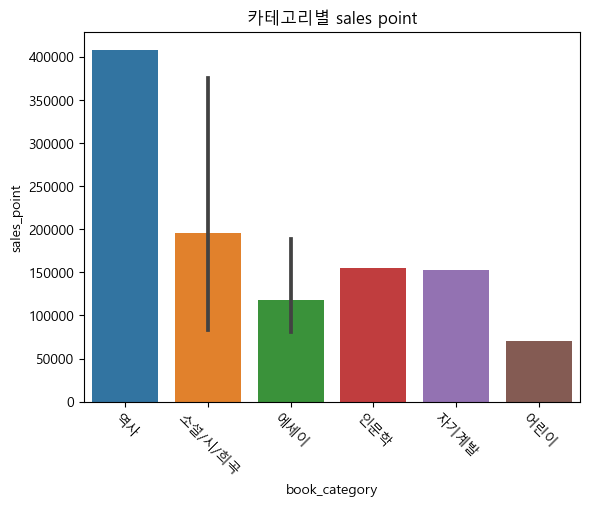

In [36]:
plt.xticks(rotation = -45)
plt.title('카테고리별 sales point')
sns.barplot(x='book_category',y='sales_point',data=sort_by_sale.head(10))
plt.show()

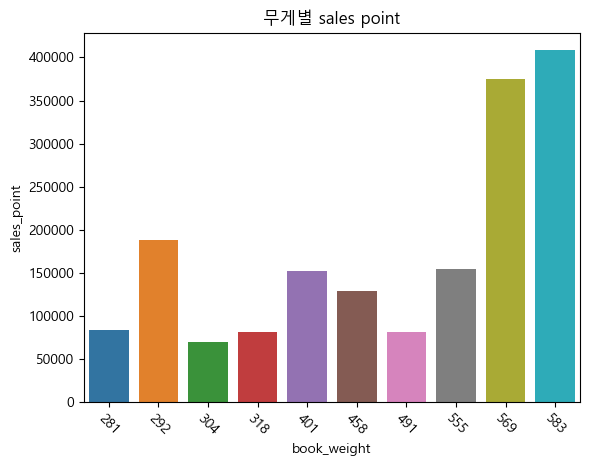

In [37]:
plt.xticks(rotation = -45)
plt.title('무게별 sales point')
sns.barplot(x='book_weight',y='sales_point',data=sort_by_sale.head(10))
plt.show()

<AxesSubplot:xlabel='book_date', ylabel='sales_point'>

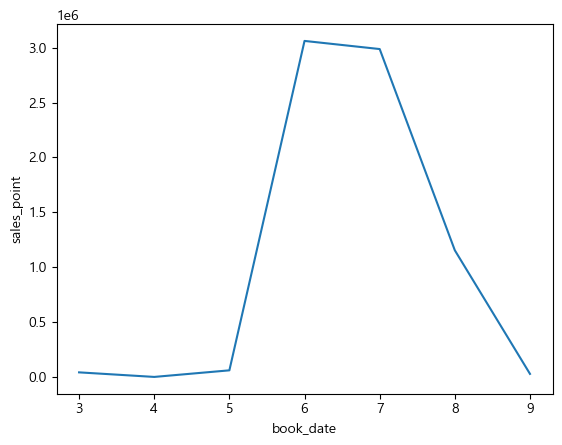

In [38]:
sns.lineplot(x='book_date',y='sales_point',data=month_avg_point)

<AxesSubplot:xlabel='book_page', ylabel='book_price'>

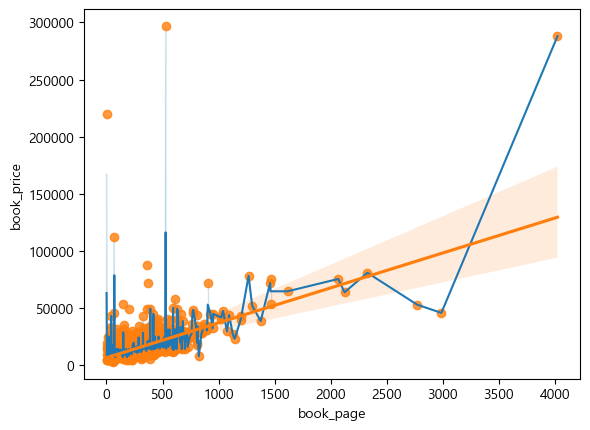

In [39]:
sns.lineplot(x='book_page',y='book_price',data=book)
sns.regplot(x='book_page',y='book_price',data=book)

### Step2에서 획득한 정보를 기술하세요.

* 가장 인기있는 작가는 유시민,히가시노 게이코 순서로 보인다.
* 합리적인 커버는 일반본이 가성비가 높다.
* 가장 세일즈 포인트가 높은 카테고리는 역사분야이다.
* 신간 제작시 가장 합리적인 책 무게는 569~583(g)
* 신간 출판 시기는 6,7월이 가장 유리하다.
* 책가격은 30,000원 이하가 가장 적당한 판매가로 판단된다.

### Step1과 Step2를 반복하며 내용을 정리하세요.

### Step1의 내용

데이터 분석의 목적, 대상 또는 가설을 세운다.
* 페이지수가 증가할 수록 책의 가격이 높아질 것이다.
* 출시한 월에따라 sales point가 다를 것이다. 9,10,11월인 가을이 높을 것이다.
* book cover가 양장본일수록 price가 높을 것이다.
* 높은 sales를 받은 책은 무엇인가?
* 카테고리별 sales point를 비교해보고자 한다.

## 2차 탐색적 데이터 분석

* 페이지수와 책의 가격간의 관계는 어느정도 정비례 관계로 보인다.
* 출시 월은 가설과 다르게 6,7월이 가장 판매횟수가 높았다.

## 3차 탐색적 데이터 분석

<AxesSubplot:xlabel='book_price', ylabel='sales_point'>

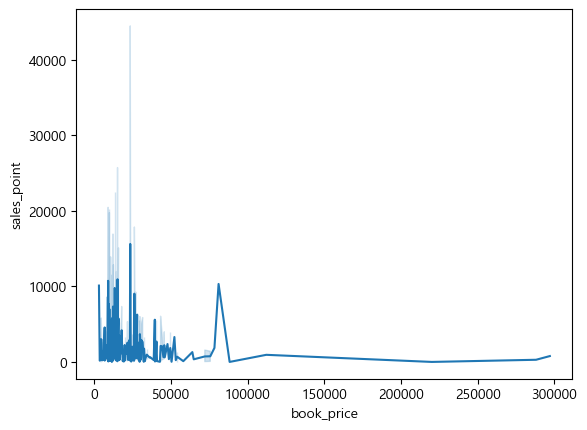

In [40]:
sns.lineplot(x='book_price',y='sales_point',data=book)

In [41]:
book[(book['book_price']>75000)&(book['book_price']<90000)&(book['sales_point']<110000)&(book['sales_point']>8000)]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
984,국수 1~6 세트 - 전6권,김성동,8,81000.0,반양장본,2328,148*210mm,3026,소설/시/희곡,솔출판사,10330.0


In [42]:
book[(book['book_name']=='역사의 역사')]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1823,역사의 역사,유시민,6,14400.0,반양장본,340,152*223mm,583,역사,돌베개,408240.0


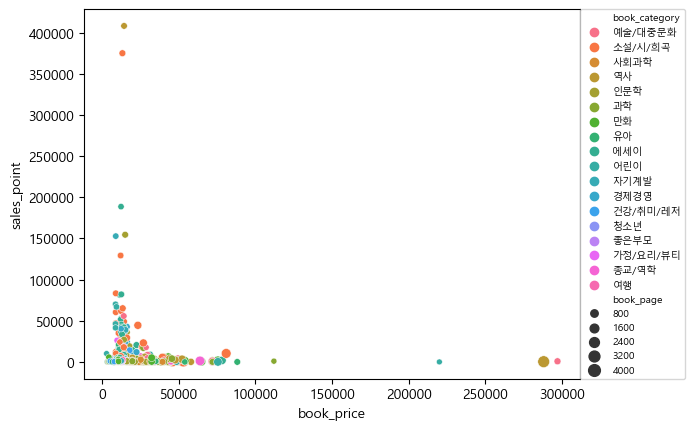

In [43]:
sns.scatterplot(data=book,x='book_price',y='sales_point',hue='book_category', size = 'book_page')
plt.legend(loc=(1,0), fontsize = 7.3)

---

## 최종결론 (차후 출시할 신간의 각 속성 추천)

* 작가는 유시민, 히가시노 게이코, 커버는 일반본, 책 무게는 569~583(g), 시기는 6,7월, 가격은 30,000원 이하
* 